## 1. Scaling

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [10]:
def standardize(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)

In [14]:
def center(Y):
    return Y - Y.mean(axis=0)

## 2. Estimation with SVD

**Truncated SVD:**
$$U = N\times p,\quad \Sigma = p\times p, \quad V^T  = p \times p$$ 

In [15]:
X = np.matrix("1 2;3 4;5 6")
X

matrix([[1, 2],
        [3, 4],
        [5, 6]])

In [16]:
svd = np.linalg.svd(X) # Full SVD
svd

(matrix([[-0.2298477 ,  0.88346102,  0.40824829],
         [-0.52474482,  0.24078249, -0.81649658],
         [-0.81964194, -0.40189603,  0.40824829]]),
 array([9.52551809, 0.51430058]),
 matrix([[-0.61962948, -0.78489445],
         [-0.78489445,  0.61962948]]))

In [17]:
svd2 = np.linalg.svd(X, full_matrices=False) # Truncated SVD
svd2

(matrix([[-0.2298477 ,  0.88346102],
         [-0.52474482,  0.24078249],
         [-0.81964194, -0.40189603]]),
 array([9.52551809, 0.51430058]),
 matrix([[-0.61962948, -0.78489445],
         [-0.78489445,  0.61962948]]))

In [18]:
np.matrix(np.diag(svd2[1]))

matrix([[9.52551809, 0.        ],
        [0.        , 0.51430058]])

In [19]:
def find_intercept(Y):
    return Y.mean(axis=0)

In [27]:
def find_beta_ridge(SVD, Y, lam):
    U, S, VT = SVD
    V = VT.T
    S_star = np.matrix(np.diag(S / (S ** 2 + lam)))
    return V * S_star * U.T * Y

def find_beta_ols(X, Y):
    return np.linalg.pinv(X) * Y

In [25]:
def find_y_hat(X, beta):
    return X * beta

In [26]:
def find_true_y_hat(X, beta, beta_0):
    return X * beta + beta_0

## Example

In [36]:
x = np.arange(0, np.math.pi, 0.1)
y = 2*x + 3 + np.random.randn(len(x))

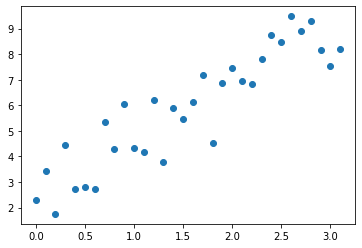

In [37]:
plt.scatter(x, y)
plt.show()

In [38]:
X = np.matrix(x).T
Y = np.matrix(y).T

Xb = sm.add_constant(X)

In [39]:
# OLS
beta_ols = find_beta_ols(Xb, Y)
y_ols = find_y_hat(Xb, beta_ols)

In [40]:
beta_ols

matrix([[2.52714283],
        [2.16577905]])

In [54]:
# Ridge
lam = 10
beta_0 = find_intercept(Y)
X_s = standardize(X)
Y_c = center(Y)
svd = np.linalg.svd(X_s, full_matrices=False)
beta_ridge = find_beta_ridge(svd, Y_c, lam)
y_ridge = find_y_hat(X_s, beta_ridge)
y_true = find_true_y_hat(X_s, beta_ridge, beta_0)

In [55]:
beta_0, beta_ridge

(matrix([[5.88410036]]), matrix([[1.52356866]]))

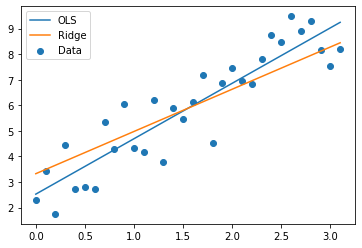

In [56]:
plt.scatter(x, y, label='Data')
plt.plot(x, y_ols, label='OLS')
plt.plot(x, y_true, label='Ridge')
plt.legend()
plt.show()

## Example 2 - Gaussian Basis

In [57]:
def phi(j, s, x):
    return np.exp(-(x - j)**2 / s)

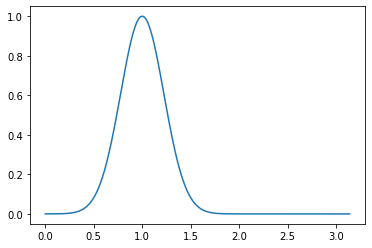

In [108]:
plt.plot(x, phi(1, 0.1, x))

In [58]:
x = np.arange(0, np.math.pi, 0.01)
y = np.sin(x) + (x / 3)**2 + 0.1 * np.random.randn(len(x))

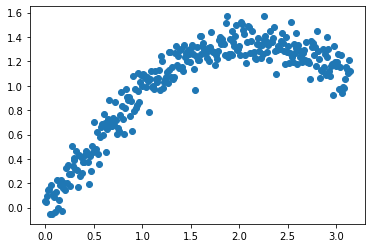

In [59]:
plt.scatter(x,y)
plt.show()

In [126]:
s = 0.1
X = np.matrix(np.column_stack([ phi(j/1000, s, x) for j in range(3142) ]))
Y = np.matrix(y).T

Xb = sm.add_constant(X)

In [127]:
# OLS
beta_ols = find_beta_ols(Xb, Y)
y_ols = find_y_hat(Xb, beta_ols)

In [132]:
# Ridge
lam = 50
beta_0 = find_intercept(Y)
X_s = standardize(X)
Y_c = center(Y)
svd = np.linalg.svd(X_s, full_matrices=False)
beta_ridge = find_beta_ridge(svd, Y_c, lam)
y_ridge = find_y_hat(X_s, beta_ridge)
y_true = find_true_y_hat(X_s, beta_ridge, beta_0)

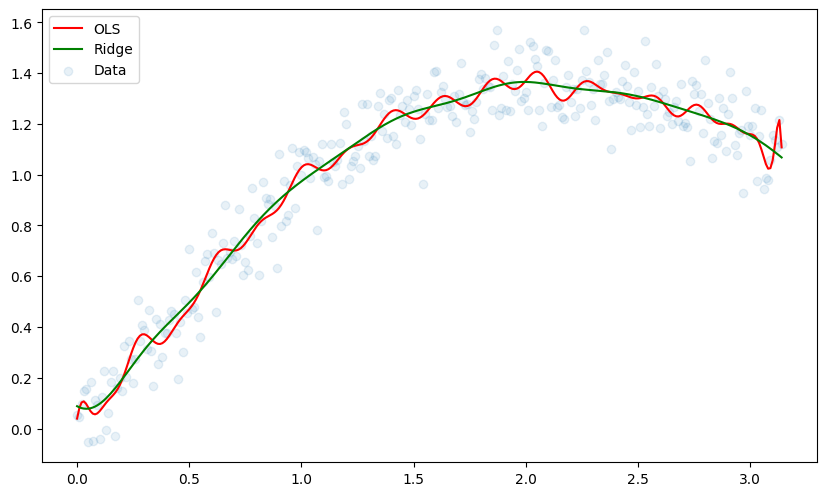

In [133]:
plt.figure(figsize=(10, 6), dpi=100)
plt.scatter(x, y, label='Data', alpha=0.1)
plt.plot(x, y_ols, color='r', label='OLS')
plt.plot(x, y_true, color='g', label='Ridge')
plt.legend()
plt.show()

$$y = w_1 x_1 + w_2 x_2 + w_3 x_3 $$

$$y = w_1 \phi_1(x) + w_2 \phi_2(x) + w_3 \phi_3(x)$$

In [ ]:
# Bishop - PRML (chap.3)